<span style="color: green">Author: Ashkan Nikfarjam</span>

Now that we have our data we are going to do AHP analysis that act as feature selection

ahp.py has all the functions to calculate AHP for us.

* <span style="color: green">Two-Sample t-Test:</span>

Purpose: Identifies statistically significant differences in gene expression between two groups (e.g., cancerous vs. healthy cells).

Method: Compares the means of two independent samples using the t-statistic.

Output: A t-score and p-value. A small p-value indicates significant differences in expression.

* <span style="color: green">Entropy Test:</span>

Purpose: Measures the disorder in gene expression levels.

Method: Computes entropy using histogram-based probability distributions.

Output: Higher entropy values indicate genes with more variability, which are more useful for classification.

* <span style="color: green">Wilcoxon Rank-Sum Test:</span>

Purpose: A non-parametric test used to rank genes based on their median expression differences.

Method: Compares the ranks of two independent samples instead of their means.

Output: A Wilcoxon statistic and a p-value. A low p-value suggests significant differences in gene ranks.

* <span style="color: green">Signal-to-Noise Ratio (SNR):</span>

Purpose: Compares the difference in mean expression levels relative to the standard deviation.

Method: SNR is calculated as the difference between the means of two groups divided by the sum of their standard deviations.

Output: A higher SNR suggests that the gene has a strong discriminatory power between groups.

* <span style="color: green">AHP Weighted Ranking:</span>

Purpose: Integrates statistical measures into a single weighted ranking system to prioritize significant genes.

Method: Normalizes scores across all statistical tests and applies predefined weights.

Output: A final ranking score indicating the importance of each gene in classification.

Try with moded AHP

* import libraries

In [2]:
import ahp 
import pandas as pd
import numpy as np
import ahp 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from rich.progress import Progress
import ahpFunctions as ahpFunctions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


* load datasets

In [2]:
#load datasets
mutated_df = pd.read_csv("../../data/DCIS_IDC_Normal.csv", index_col=0)  # Cancer data
benign_df = pd.read_csv("../../data/DCIS_IDC_Malignant.csv", index_col=0)  # Healthy data

In [3]:
mutated_df.head()

TCGA-BH-A0DV-11A-22R-A12P-07  TCGA-BH-A0BC-11A-22R-A089-07  \
Genes                                                                  
A1BG                          4.583441                      3.430355   
A1BG-AS1                      2.074804                      0.594683   
A1CF                          0.029291                      0.017338   
A2M                         891.304796                   1027.552125   
A2ML1                         0.407684                      1.591699   

          TCGA-BH-A0BM-11A-12R-A089-07  TCGA-AC-A2FB-11A-13R-A17B-07  \
Genes                                                                  
A1BG                          7.794268                      4.969156   
A1BG-AS1                      1.531802                      1.423566   
A1CF                          0.026750                      0.007487   
A2M                         769.492283                   1219.532714   
A2ML1                         2.157845                      0.565392   

          TCGA-A7-A13E-11A-61R-A12P-07  TCGA-BH-A0BA-11A-22R-A19E-07  \
Genes                                                                  
A1BG                          2.954479                      6.080101   
A1BG-AS1                      0.979833                      1.833113   
A1CF                          0.012884                      0.040975   
A2M                        1519.749915                   1031.124367   
A2ML1                         0.320481                      0.897928   

          TCGA-BH-A1FC-11A-32R-A13Q-07  TCGA-E9-A1R7-11A-42R-A14M-07  \
Genes                                                                  
A1BG                          5.540964                      1.373326   
A1BG-AS1                      1.908301                      0.965365   
A1CF                          0.015798                      0.005533   
A2M                        1197.183488                   1398.533894   
A2ML1                         0.294743                      0.511213   

          TCGA-BH-A0BQ-11A-33R-A115-07  TCGA-AC-A2FF-11A-13R-A17B-07  ...  \
Genes                                                                 ...   
A1BG                          5.078273                      6.706611  ...   
A1BG-AS1                      1.959023                      2.237764  ...   
A1CF                          0.013072                      0.034105  ...   
A2M                        1339.187209                   1137.596695  ...   
A2ML1                         1.974174                      0.774301  ...   

          TCGA-BH-A1FB-11A-33R-A13Q-07  TCGA-BH-A0DO-11A-22R-A12D-07  \
Genes                                                                  
A1BG                          7.990472                      6.302861   
A1BG-AS1                      3.584521                      1.741917   
A1CF                          0.007154                      0.026669   
A2M                         741.943041                    777.919947   
A2ML1                         0.343201                      0.578104   

          TCGA-BH-A0H7-11A-13R-A089-07  TCGA-BH-A0DD-11A-23R-A12P-07  \
Genes                                                                  
A1BG                          8.226531                      1.432410   
A1BG-AS1                      1.672998                      0.480103   
A1CF                          0.009589                      0.000000   
A2M                         582.868269                   1144.629548   
A2ML1                         1.090392                      0.411468   

          TCGA-AC-A23H-11A-12R-A157-07  TCGA-BH-A0C3-11A-23R-A12P-07  \
Genes                                                                  
A1BG                          2.721933                      7.486664   
A1BG-AS1                      1.286758                      3.153685   
A1CF                          0.030975                      0.033568   
A2M                        1071.025786                    975.513017   
A2ML1   

In [4]:
benign_df.head()

TCGA-A2-A0T1-01A-21R-A084-07  TCGA-A7-A3J0-01A-11R-A213-07  \
Genes                                                                  
A1BG                          3.554418                     24.851102   
A1BG-AS1                      1.126241                      3.723119   
A1CF                          0.008392                      0.000000   
A2M                         425.868340                    156.271227   
A2ML1                         3.488973                      0.492898   

          TCGA-AO-A126-01A-11R-A10J-07  TCGA-E2-A14X-01A-11R-A115-07  \
Genes                                                                  
A1BG                         37.604899                      3.148319   
A1BG-AS1                      1.530582                      1.783702   
A1CF                          0.029567                      0.048623   
A2M                         300.640797                    406.091231   
A2ML1                         0.112573                     22.525628   

          TCGA-A7-A13G-01A-11R-A13Q-07  TCGA-AR-A0TP-01A-11R-A084-07  \
Genes                                                                  
A1BG                          4.088710                     11.884501   
A1BG-AS1                      1.725531                      2.119275   
A1CF                          0.341332                      0.014651   
A2M                          98.289505                   6985.208108   
A2ML1                         0.382082                      0.164870   

          TCGA-E2-A15S-01A-11R-A115-07  TCGA-A2-A1FW-01A-11R-A13Q-07  \
Genes                                                                  
A1BG                         14.742418                      1.262722   
A1BG-AS1                      2.147039                      0.862180   
A1CF                          0.012630                      0.050475   
A2M                         236.668156                    337.779713   
A2ML1                         0.231883                      0.252745   

          TCGA-HN-A2OB-01A-21R-A27Q-07  TCGA-B6-A0I1-01A-11R-A21T-07  ...  \
Genes                                                                 ...   
A1BG                         19.940351                      2.648173  ...   
A1BG-AS1                      3.096331                      0.905886  ...   
A1CF                          0.000000                      0.089233  ...   
A2M                         561.773513                     91.765206  ...   
A2ML1                         0.349747                     22.093346  ...   

          TCGA-A2-A0YJ-01A-11R-A109-07  TCGA-A2-A0T4-01A-31R-A084-07  \
Genes                                                                  
A1BG                          3.397926                     17.773175   
A1BG-AS1                      1.151397                      1.957328   
A1CF                          0.000000                      0.006250   
A2M                         100.929053                    583.465200   
A2ML1                        39.667941                      0.166582   

          TCGA-AR-A1AH-01A-11R-A12D-07  TCGA-E9-A1RG-01A-11R-A14D-07  \
Genes                                                                  
A1BG                         11.462378                     27.570166   
A1BG-AS1                      2.090781                      0.970987   
A1CF                          0.028324                      0.009043   
A2M                         467.004374                    120.465449   
A2ML1                         3.808035                      0.200856   

          TCGA-GM-A2DL-01A-11R-A18M-07  TCGA-A8-A09R-01A-11R-A00Z-07  \
Genes                                                                  
A1BG                         16.125303                     13.748285   
A1BG-AS1                      1.720068                      3.131332   
A1CF                          0.029128                      0.029876   
A2M                         344.663821                    340.526407   
A2ML1   

<span style="color: green">Conventional AHP:</span>

In [5]:

# Create DataFrame with results
conv_ahp_results_df = pd.DataFrame({
    "Gene": mutated_df.index.tolist(),  # Ensure it works correctly
    "T_Score": ahp.compute_t_test(mutated_df.values, benign_df.values),
    "Entropy": ahp.compute_entropy(mutated_df.values, benign_df.values),
    "ROC_AUC": ahp.compute_roc_auc(mutated_df.values, benign_df.values),
    "Wilcoxon": ahp.compute_wilcoxon(mutated_df.values, benign_df.values),
    "SNR": ahp.compute_snr(mutated_df.values, benign_df.values),
    "AHP_Score": ahp.compute_ahp_weighted_ranking(mutated_df.values, benign_df.values)
})

print(conv_ahp_results_df.head())

Before Normalization:
NaN in scores: 119
T-Test NaN count: 119
Entropy NaN count: 0
ROC_AUC NaN count: 0
Wilcoxon NaN count: 0
SNR NaN count: 0
After Normalization:
NaN in normalized scores: 119
Final AHP Rankings NaN count: 119
       Gene    T_Score        Entropy   ROC_AUC    Wilcoxon       SNR  \
0      A1BG  14.918537     248.955772  0.201958  367.187581  0.436874   
1  A1BG-AS1   5.487732       1.564432  0.386842  139.410757  0.234907   
2      A1CF   0.126623       0.063398  0.557538   70.886743  0.005238   
3       A2M  18.928504  262674.320969  0.930073  529.850514  0.714520   
4     A2ML1   7.146096     871.725453  0.611932  137.900559  0.207594   

   AHP_Score  
0   0.282773  
1   0.176295  
2   0.135997  
3   0.535106  
4   0.226407  


* ploting the result

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

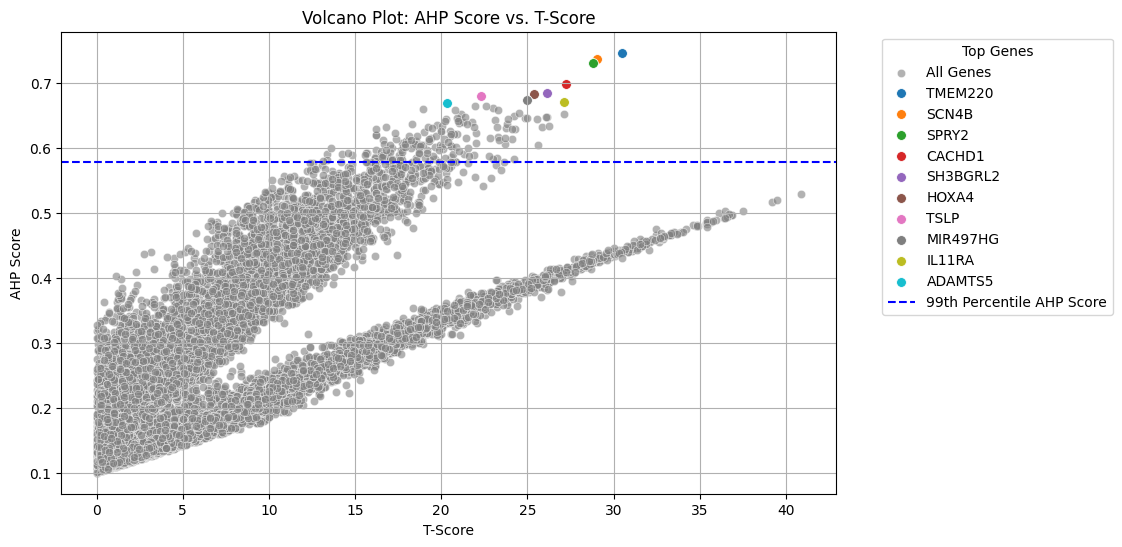

In [6]:

# Copy data and determine top genes based on AHP Score
data = conv_ahp_results_df.copy()
top_n = int(len(data) * 0.01)  # Top 1% genes
top_genes = data.nlargest(top_n, 'AHP_Score')

# Select the top 10 genes and assign unique colors
top_gene_names = top_genes.nlargest(10, 'AHP_Score')["Gene"].tolist()
colors = sns.color_palette("tab10", len(top_gene_names))
gene_color_map = dict(zip(top_gene_names, colors))

# Create Volcano Plot
plt.figure(figsize=(10, 6))

# Scatter plot for all genes (gray background)
sns.scatterplot(x=data["T_Score"], y=data["AHP_Score"], color="gray", alpha=0.6, label="All Genes")

# Plot each top gene with a distinct color
for gene, color in gene_color_map.items():
    gene_data = top_genes[top_genes["Gene"] == gene]
    sns.scatterplot(x=gene_data["T_Score"], y=gene_data["AHP_Score"], color=color, label=gene, s=50)

# Labels and formatting
plt.xlabel("T-Score")
plt.ylabel("AHP Score")
plt.title("Volcano Plot: AHP Score vs. T-Score")
plt.axhline(y=data["AHP_Score"].quantile(0.99), color="blue", linestyle="dashed", label="99th Percentile AHP Score")
plt.legend(title="Top Genes", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside for clarity
plt.grid(True)

# Show the plot
plt.show()

In [7]:

# Selecting top genes based on AHP Score for visualization
top_genes_df = conv_ahp_results_df.nlargest(200, 'AHP_Score')  # Selecting top 100 most expressive genes

# Creating an interactive scatter plot
fig = px.scatter(
    top_genes_df,
    x="T_Score",
    y="Entropy",
    size="ROC_AUC",
    color="AHP_Score",
    hover_data=["Gene", "Wilcoxon", "SNR", "AHP_Score"],
    title="Top 200 Most Expressive Genes Ranked by AHP Score",
    labels={"T_Score": "T Score", "Entropy": "Entropy", "ROC_AUC": "ROC AUC", "AHP_Score": "AHP Score"},
    color_continuous_scale="Viridis"
)

# Display interactive plot
fig.show()

As we can visually see the geen that has ranked the highest is ARF1. ADP-ribosylation factor 1 (ARF1) is a protein that helps regulate vesicle formation and transport.

Function: 
* ARF1 is a key regulator of vesicle formation at the Golgi
* It's involved in intra-Golgi transport
* It's involved in retrograde transport between the Golgi and the endoplasmic reticulum
* It's involved in messenger RNA transport
* It's involved in mTORC1 activity
* It's involved in mitochondrial dynamics and transport

The Golgi apparatus, also known as the Golgi body or Golgi complex, is an organelle in cells that processes and packages proteins and lipids. 

Function: 
* Prepares proteins and lipids for use inside and outside the cell
* Processes and sorts proteins for transport to their destinations
* Synthesizes glycolipids and sphingomyelin
* Synthesizes complex polysaccharides of the cell wall in plant cells

# <span style="color: green">Modified AHP</span>



**Note:** This code take long time to execure please run ***computeAHP.py*** to create the score data frame and eigen vectors 

In [8]:


# # Load datasets

# mutated_df.fillna(0, inplace=True)
# benign_df.fillna(0, inplace=True)
# num_samples = min(mutated_df.shape[1], benign_df.shape[1])


# # Use progress bar to track computations
# results = {}

# with Progress() as progress:
#     task = progress.add_task("[cyan]Computing AHP scores...", total=8)
#     t_test, p_value = ahpFunctions.compute_t_test(mutated_df.iloc[:, :num_samples].values, benign_df.iloc[:, :num_samples].values)
#     results["T_Score"] = t_test
#     results["p_values"] = p_value
#     progress.update(task, advance=1)

#     results["Entropy"] = ahpFunctions.compute_entropy(mutated_df.iloc[:, :num_samples].values, benign_df.iloc[:, :num_samples].values)
#     progress.update(task, advance=1)

#     results["ROC_AUC"] = ahpFunctions.compute_roc_auc(mutated_df.iloc[:, :num_samples].values, benign_df.iloc[:, :num_samples].values)
#     progress.update(task, advance=1)

#     results["Wilcoxon"] = ahpFunctions.compute_wilcoxon(mutated_df.iloc[:, :num_samples].values, benign_df.iloc[:, :num_samples].values)
#     progress.update(task, advance=1)

#     results["SNR"] = ahpFunctions.compute_snr(mutated_df.iloc[:, :num_samples].values, benign_df.iloc[:, :num_samples].values)
#     progress.update(task, advance=1)

#     scores, eigenvalues = ahpFunctions.compute_ahp_scores(mutated_df.iloc[:, :num_samples].values, benign_df.iloc[:, :num_samples].values)
#     progress.update(task, advance=1)
    
#     results["AHP_Score"] = scores
#     progress.update(task, advance=1)

#     # results["Eigen_Values"]= eigenvalues
#     # progress.update(task, advance=1)

# # Create DataFrame with results
# results_df = pd.DataFrame({"Gene": mutated_df.index.tolist(), **results})

# print(results_df.head())
# results_df.to_csv("ahp.csv", index=False)
# eigen_vectors = np.load("eigen_vectors.npy")

In [9]:
"""
Visualizing our founded scores
"""

scores_df = pd.read_csv("ahp.csv")
scores_df.head()

Gene   T_Score      p_values        Entropy   ROC_AUC   Wilcoxon  \
0      A1BG  7.592888  4.615486e-12   3.422282e-01  0.214191  64.592920   
1  A1BG-AS1  3.341028  9.788593e-04   2.935428e-01  0.385543  25.867257   
2      A1CF  1.109616  2.691711e-01  1.797693e+308  0.571540  16.168142   
3       A2M  6.305205  3.764257e-09   4.345073e-01  0.926776  96.451327   
4     A2ML1  3.268568  1.432402e-03   3.263582e+00  0.582505  18.646018   

        SNR  AHP_Score  
0  0.569823   0.000052  
1  0.223421   0.000037  
2  0.083984   0.000069  
3  0.472300   0.000083  
4  0.289954   0.000040

In [10]:
"""
DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)[source]
Compute pairwise correlation of columns, excluding NA/null values.

Parameters:
method{‘pearson’, ‘kendall’, ‘spearman’} or callable
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

callable: callable with input two 1d ndarrays
and returning a float. Note that the returned matrix from corr will have 1 along the diagonals and will be symmetric regardless of the callable’s behavior.


"""
correlation_df=scores_df.iloc[:,1:].corr(method='spearman')
correlation_df.head()

T_Score  p_values   Entropy   ROC_AUC  Wilcoxon       SNR  \
T_Score   1.000000 -0.999891 -0.193105  0.068950  0.802047  0.995934   
p_values -0.999891  1.000000  0.221379 -0.075177 -0.797368 -0.994851   
Entropy  -0.193105  0.221379  1.000000  0.166286 -0.016360 -0.163469   
ROC_AUC   0.068950 -0.075177  0.166286  1.000000  0.300502  0.037245   
Wilcoxon  0.802047 -0.797368 -0.016360  0.300502  1.000000  0.801918   

          AHP_Score  
T_Score    0.510192  
p_values  -0.499713  
Entropy    0.491624  
ROC_AUC    0.404348  
Wilcoxon   0.672847

In [11]:
import plotly.express as px

figure = px.imshow(correlation_df)
figure.show()

This correlation heatmap helps analyze how the Modified AHP Score relates to other gene selection metrics like T-score, p-values, Entropy, ROC AUC, Wilcoxon, and SNR. Here's how you can interpret it:

Strong Positive Correlation (Yellow Areas, Close to 1)

If AHP_Score shows a strong correlation (values close to 1) with a metric like SNR or Wilcoxon, it suggests that the AHP method is heavily influenced by these criteria.
This means genes ranked high by AHP were also ranked high by those methods.
Strong Negative Correlation (Dark Blue Areas, Close to -1)

A strong negative correlation (e.g., with p-values) suggests that lower p-values (higher statistical significance) align with higher AHP scores.
This indicates that AHP prioritizes genes with strong statistical significance in differential expression.
Moderate Correlation (Orange/Purple Areas, Around 0.5 or -0.5)

A moderate correlation with ROC_AUC might indicate that AHP does consider predictive ability (AUC) but not as the sole determinant.
Low/No Correlation (Near 0, Neutral Colors)

If AHP_Score has near-zero correlation with Entropy, it suggests that entropy-based rankings were not a strong factor in the final AHP decision.

* Key Takeaways for Cancer Classification

If AHP_Score strongly correlates with T-Score, Wilcoxon, or SNR, it suggests that your feature selection prefers genes that show significant expression differences and high signal-to-noise ratios.

If p-values show a strong negative correlation with AHP_Score, it confirms that AHP is successfully prioritizing statistically significant genes.

If your final gene selection aligns with high AHP scores, those genes are more reliable for Hidden Markov Model-based classification.

In [12]:
scores_df.shape

(17531, 8)

In [13]:

# Select numerical features
features = ["T_Score", "Entropy", "ROC_AUC", "Wilcoxon", "SNR", "AHP_Score"]
X = scores_df[features]

# Handle missing values by filling them with column means
imputer = SimpleImputer(strategy="mean")  # Replace NaNs with mean values
X_imputed = imputer.fit_transform(X)

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

# Add PCA components back to the dataframe
scores_df["PCA1"] = X_pca[:, 0]
scores_df["PCA2"] = X_pca[:, 1]

# Create an interactive Plotly scatterplot
fig = px.scatter(scores_df, 
                 x="PCA1", 
                 y="PCA2", 
                 color="AHP_Score",
                 hover_data=["Gene"],
                 title="PCA of Gene AHP Scores"
                 )

fig.update_layout(coloraxis_colorbar=dict(title="AHP Score"))
fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning:

overflow encountered in reduce

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_base.py:577: UserWarning:

Skipping features without any observed values: ['Entropy']. At least one non-missing value is needed for imputation with strategy='mean'.



In [14]:
#do the same thing for conventional AHP to compare
# Select numerical features
features = ["T_Score", "Entropy", "ROC_AUC", "Wilcoxon", "SNR", "AHP_Score"]
X = conv_ahp_results_df[features]

# Handle missing values by filling them with column means
imputer = SimpleImputer(strategy="mean")  # Replace NaNs with mean values
X_imputed = imputer.fit_transform(X)

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

# Add PCA components back to the dataframe
conv_ahp_results_df["PCA1"] = X_pca[:, 0]
conv_ahp_results_df["PCA2"] = X_pca[:, 1]

# Create an interactive Plotly scatterplot
fig = px.scatter(conv_ahp_results_df, 
                 x="PCA1", 
                 y="PCA2", 
                 color="AHP_Score",
                 hover_data=["Gene"],
                 title="PCA of Gene Concentional AHP Scores"
                 )

fig.update_layout(coloraxis_colorbar=dict(title="AHP Score"))
fig.show()

Since dataset is not specificly for the breast cancer and multiple cancer instead i want to also check the highly expressed gene in the DCIS dataset


In [3]:
DCIS_dataset = pd.read_csv("DCIS_renamed_data.csv", names=['Gene','DCIS','DCIS.1','DCIS.2','DCIS.3','DCIS.4','DCIS.5','DCIS.6','IDC','IDC.1','IDC.2','IDC.3','IDC.4','IDC.5','IDC.6'], header=0)
DCIS_dataset

Gene     DCIS   DCIS.1   DCIS.2   DCIS.3   DCIS.4   DCIS.5   DCIS.6  \
0         RFC2  7.36310  8.80421  7.89757  8.03774  8.02325  8.68432  7.74527   
1        HSPA6  7.15033  7.54750  7.38728  7.83062  7.48968  7.40944  7.38014   
2         PAX8  9.42942  9.24060  9.22688  9.55712  9.23641  9.43731  9.73340   
3       GUCA1A  4.63231  4.75544  4.72679  4.64048  4.65596  4.67152  4.66606   
4      MIR5193  8.55953  7.77528  9.99362  8.29521  7.47254  8.11136  8.26734   
...        ...      ...      ...      ...      ...      ...      ...      ...   
54607  EHBP1L1  6.17956  6.28655  6.09309  6.27954  6.48258  6.11709  5.92057   
54608    MEX3D  8.32139  8.42359  7.65504  7.80975  8.48139  8.63277  9.26466   
54609   EPS8L1  8.86409  9.03134  8.93064  8.20393  9.34552  8.19034  8.40646   
54610     BCAN  8.23225  8.45223  8.26617  8.23190  8.18839  8.32659  8.31332   
54611   DCAF15  7.25991  7.31001  7.59252  7.42316  7.60465  7.27683  7.37382   

           IDC    IDC.1    IDC.2    IDC.3    IDC.4    IDC.5    IDC.6  
0      7.64793  7.67504  7.96238  7.80427  8.02817  8.54249  7.47866  
1      7.38607  7.49030  7.76639  7.57006  7.48716  7.16147  7.26925  
2      9.67986  9.27590  9.38470  9.56993  9.49319  9.36365  9.67886  
3      4.77911  4.82142  4.66761  4.75065  4.57288  4.69762  4.76414  
4      8.26480  7.89782  8.76705  8.82711  7.82248  8.35062  8.38374  
...        ...      ...      ...      ...      ...      ...      ...  
54607  5.98240  6.06009  6.36389  6.23832  6.82293  7.05653  6.01689  
54608  7.95418  9.13631  7.71274  7.91680  7.76904  7.88847  8.73703  
54609  8.44893  8.64302  8.76053  8.27957  8.41600  8.03586  8.27489  
54610  8.20153  8.08062  8.17031  8.17250  8.21222  8.24798  8.42062  
54611  6.95092  7.20785  7.90691  7.19820  7.51745  7.35828  7.47514  

[54612 rows x 15 columns]

In [4]:
type(DCIS_dataset['Gene'].to_numpy())

numpy.ndarray

In [5]:
DCIS_dataset=DCIS_dataset.set_index(DCIS_dataset['Gene'].to_numpy())

In [6]:
DCIS_dataset.drop(columns=DCIS_dataset.columns[0],inplace=True)
DCIS_dataset.head()

DCIS   DCIS.1   DCIS.2   DCIS.3   DCIS.4   DCIS.5   DCIS.6  \
RFC2     7.36310  8.80421  7.89757  8.03774  8.02325  8.68432  7.74527   
HSPA6    7.15033  7.54750  7.38728  7.83062  7.48968  7.40944  7.38014   
PAX8     9.42942  9.24060  9.22688  9.55712  9.23641  9.43731  9.73340   
GUCA1A   4.63231  4.75544  4.72679  4.64048  4.65596  4.67152  4.66606   
MIR5193  8.55953  7.77528  9.99362  8.29521  7.47254  8.11136  8.26734   

             IDC    IDC.1    IDC.2    IDC.3    IDC.4    IDC.5    IDC.6  
RFC2     7.64793  7.67504  7.96238  7.80427  8.02817  8.54249  7.47866  
HSPA6    7.38607  7.49030  7.76639  7.57006  7.48716  7.16147  7.26925  
PAX8     9.67986  9.27590  9.38470  9.56993  9.49319  9.36365  9.67886  
GUCA1A   4.77911  4.82142  4.66761  4.75065  4.57288  4.69762  4.76414  
MIR5193  8.26480  7.89782  8.76705  8.82711  7.82248  8.35062  8.38374

In [7]:
print(np.load('eigen_vectors.npy', allow_pickle=True))

{'t_test': array([ 1.75310000e+04,  3.00059013e-11, -4.79700678e-13, ...,
        1.34138390e-30,  7.57722060e-32,  7.57722060e-32]), 'entropy': array([ 1.75310000e+04, -1.62632506e-09, -3.79518046e-10, ...,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), 'roc_auc': array([ 1.75310000e+04, -3.35426118e-11,  2.10401341e-12, ...,
        2.15512322e-61, -6.08334485e-61, -4.33081673e-61]), 'wilcoxon': array([ 1.75310000e+04, -1.74540614e-11, -1.74540614e-11, ...,
       -4.09937671e-90, -3.68337664e-90, -1.29206207e-90]), 'snr': array([ 1.75310000e+04, -1.20410257e-11, -1.20410257e-11, ...,
        9.02114456e-31, -6.17779689e-31,  1.36730936e-31])}


In [8]:
df = pd.DataFrame(np.load('eigen_vectors.npy', allow_pickle=True).item())
df

t_test        entropy       roc_auc      wilcoxon           snr
0      1.753100e+04   1.753100e+04  1.753100e+04  1.753100e+04  1.753100e+04
1      3.000590e-11  -1.626325e-09 -3.354261e-11 -1.745406e-11 -1.204103e-11
2     -4.797007e-13  -3.795180e-10  2.104013e-12 -1.745406e-11 -1.204103e-11
3     -4.797007e-13  -8.037705e-11  2.104013e-12  4.464477e-12 -2.459388e-11
4      1.484568e-11   7.996748e-12 -8.438778e-12  4.464477e-12  4.139835e-12
...             ...            ...           ...           ...           ...
17526  1.203617e-30  4.940656e-324  9.937421e-61  2.005732e-90 -7.476872e-31
17527  1.341384e-30   0.000000e+00  9.937421e-61 -4.099377e-90  9.021145e-31
17528  1.341384e-30   0.000000e+00  2.155123e-61 -4.099377e-90  9.021145e-31
17529  7.577221e-32   0.000000e+00 -6.083345e-61 -3.683377e-90 -6.177797e-31
17530  7.577221e-32   0.000000e+00 -4.330817e-61 -1.292062e-90  1.367309e-31

[17531 rows x 5 columns]

In [9]:
fig = px.imshow(df, 
                zmin=df.quantile(0.05).min(),  # Set lower bound at 5th percentile
                zmax=df.quantile(0.95).max(),  # Set upper bound at 95th percentile
                color_continuous_scale="Plasma")

fig.show()


In [14]:
DCIS_dataset.head()

DCIS   DCIS.1   DCIS.2   DCIS.3   DCIS.4   DCIS.5   DCIS.6  \
RFC2     7.36310  8.80421  7.89757  8.03774  8.02325  8.68432  7.74527   
HSPA6    7.15033  7.54750  7.38728  7.83062  7.48968  7.40944  7.38014   
PAX8     9.42942  9.24060  9.22688  9.55712  9.23641  9.43731  9.73340   
GUCA1A   4.63231  4.75544  4.72679  4.64048  4.65596  4.67152  4.66606   
MIR5193  8.55953  7.77528  9.99362  8.29521  7.47254  8.11136  8.26734   

             IDC    IDC.1    IDC.2    IDC.3    IDC.4    IDC.5    IDC.6  
RFC2     7.64793  7.67504  7.96238  7.80427  8.02817  8.54249  7.47866  
HSPA6    7.38607  7.49030  7.76639  7.57006  7.48716  7.16147  7.26925  
PAX8     9.67986  9.27590  9.38470  9.56993  9.49319  9.36365  9.67886  
GUCA1A   4.77911  4.82142  4.66761  4.75065  4.57288  4.69762  4.76414  
MIR5193  8.26480  7.89782  8.76705  8.82711  7.82248  8.35062  8.38374

In [13]:
# Create the box plot
fig = px.box(DCIS_dataset.sort_values(by='T_Score', ascending=False).iloc[:50,:], 
             x=DCIS_dataset.index, 
             y="T_Score", 
             color="AHP_Score",  # Color by AHP score
             title="Gene T-score Distribution with AHP Score Coloring",
             labels={"T-score": "T-score", "Gene": "Gene Name", "AHP-score": "AHP Score"},
             type='box')

# Update layout for readability
fig.update_layout(xaxis_tickangle=-45, xaxis_title="Gene", yaxis_title="T-score")

# Show the figure
fig.show()


KeyError: 'T_Score'

In [ ]:
import pandas as pd

file = pd.read_csv('clinicalDF.csv')
file.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 421 columns):
 #    Column                                                Non-Null Count  Dtype  
---   ------                                                --------------  -----  
 0    Samples                                               2201 non-null   object 
 1    bcr_patient_barcode                                   2059 non-null   object 
 2    bcr_patient_uuid                                      2059 non-null   object 
 3    form_completion_date                                  2059 non-null   object 
 4    prospective_collection                                2059 non-null   object 
 5    retrospective_collection                              2059 non-null   object 
 6    birth_days_to                                         2059 non-null   object 
 7    gender                                                2059 non-null   object 
 8    height_cm_at_diagnosis                        

/var/folders/pd/wynthhk510v_lw3l_4q234gh0000gn/T/ipykernel_38477/2015943436.py:3: DtypeWarning: Columns (21,22,23,24,26,36,37,45,50,51,52,53,62,63,64,65,66,67,71,72,73,74,76,77,78,80,82,83,85,86,87,88,89,90,91,92,93,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,116,118,119,122,123,124,127) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv('clinicalDF.csv')


In [2]:
import pickle

with open('./AHPresults/t_test_pwm.pkl', 'rb') as file:
    t_test_pwm = pickle.load(file) 

t_test_pwm.toarray()

array([[1.        , 0.6212788 , 0.8996392 , ..., 0.5625361 , 1.016018  ,
        0.88053334],
       [1.6095834 , 1.        , 1.4480443 , ..., 0.9054488 , 1.6353656 ,
        1.4172918 ],
       [1.1115568 , 0.6905866 , 1.        , ..., 0.6252908 , 1.1293616 ,
        0.97876275],
       ...,
       [1.7776636 , 1.1044247 , 1.5992558 , ..., 1.        , 1.8061383 ,
        1.5652921 ],
       [0.9842345 , 0.61148405, 0.88545597, ..., 0.5536675 , 1.        ,
        0.86665136],
       [1.1356753 , 0.705571  , 1.021698  , ..., 0.6388584 , 1.1538665 ,
        1.        ]], dtype=float32)